Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [126]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r'C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size) ##todo

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

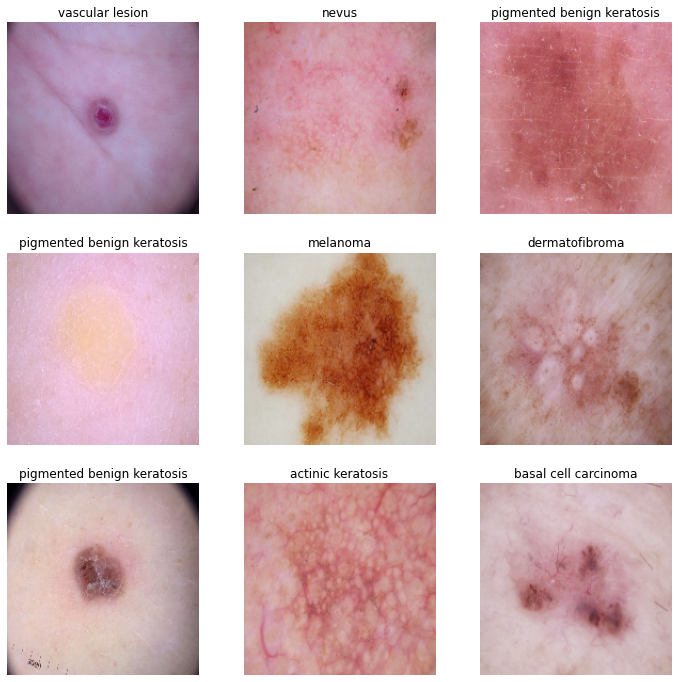

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]])
        plt.axis("off")
        plt.imshow(images[i].numpy().astype("uint8"))
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
total_classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(total_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
tf.keras.utils.plot_model(model1, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


### Train the model

In [21]:
epoch = 20

history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epoch
)

Epoch 1/20
56/56 [==============================] - 40s 611ms/step - loss: 2.0966 - accuracy: 0.2662 - val_loss: 1.7956 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 29s 526ms/step - loss: 1.7184 - accuracy: 0.3817 - val_loss: 1.5506 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 30s 534ms/step - loss: 1.5066 - accuracy: 0.4777 - val_loss: 1.4669 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 29s 516ms/step - loss: 1.4214 - accuracy: 0.5061 - val_loss: 1.3944 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 30s 529ms/step - loss: 1.2975 - accuracy: 0.5379 - val_loss: 1.4534 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 29s 517ms/step - loss: 1.2581 - accuracy: 0.5497 - val_loss: 1.4443 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 29s 523ms/step - loss: 1.2073 - accuracy: 0.5625 - val_loss: 1.4385 - val_accuracy: 0.4989

In [22]:
total_classes = 9

model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(total_classes)
])


In [23]:
model2.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [25]:
epoch = 20

history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epoch
)

Epoch 1/20
56/56 [==============================] - 34s 583ms/step - loss: 1.9996 - accuracy: 0.2651 - val_loss: 1.7804 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 32s 565ms/step - loss: 1.5595 - accuracy: 0.4531 - val_loss: 1.7480 - val_accuracy: 0.4094
Epoch 3/20
56/56 [==============================] - 31s 560ms/step - loss: 1.3421 - accuracy: 0.5335 - val_loss: 1.4344 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 31s 553ms/step - loss: 1.2073 - accuracy: 0.5759 - val_loss: 1.3412 - val_accuracy: 0.5570
Epoch 5/20
56/56 [==============================] - 32s 567ms/step - loss: 1.0828 - accuracy: 0.6244 - val_loss: 1.3408 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 31s 554ms/step - loss: 1.0032 - accuracy: 0.6390 - val_loss: 1.3211 - val_accuracy: 0.5503
Epoch 7/20
56/56 [==============================] - 32s 564ms/step - loss: 0.8744 - accuracy: 0.6719 - val_loss: 1.5506 - val_accuracy: 0.5257

### Visualizing training results

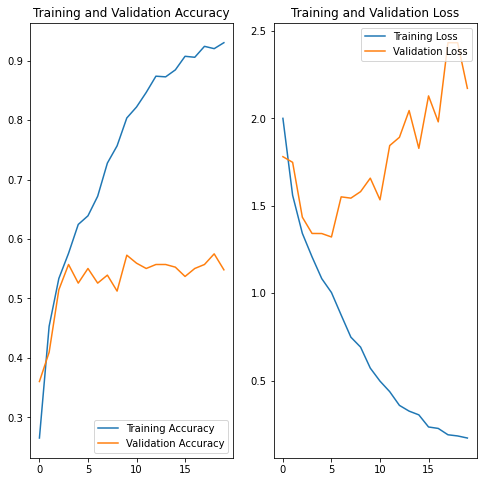

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Training Accuracy: 93.02
#### Validation Accuracy: 54.81

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

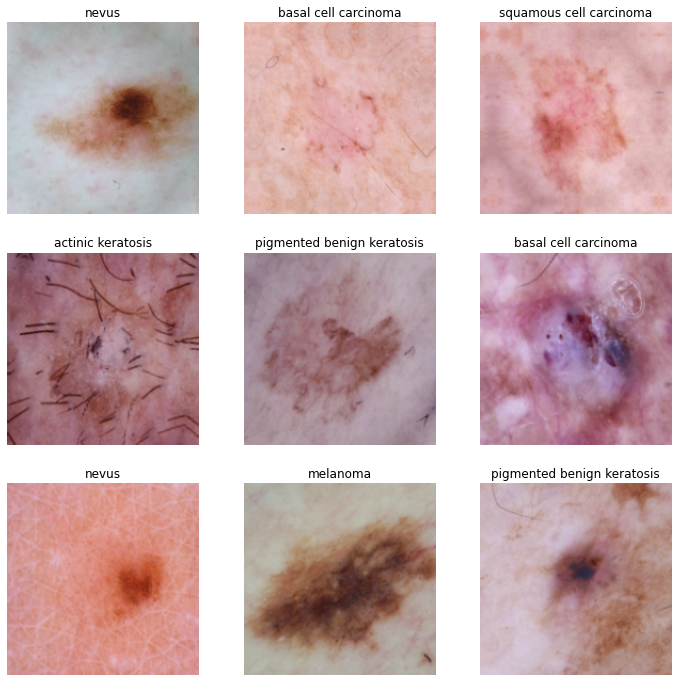

In [33]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

### Todo:
### Create the model, compile and train the model


In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model3 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(total_classes)
])


### Compiling the model

In [36]:
## Your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
epoch = 20

history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epoch
)

Epoch 1/20
56/56 [==============================] - 45s 717ms/step - loss: 2.0698 - accuracy: 0.2662 - val_loss: 1.8060 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 33s 593ms/step - loss: 1.7472 - accuracy: 0.3817 - val_loss: 1.6452 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 33s 599ms/step - loss: 1.5352 - accuracy: 0.4615 - val_loss: 1.5025 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 34s 611ms/step - loss: 1.4271 - accuracy: 0.5033 - val_loss: 1.4948 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 34s 605ms/step - loss: 1.4334 - accuracy: 0.5017 - val_loss: 1.4572 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 34s 602ms/step - loss: 1.3383 - accuracy: 0.5329 - val_loss: 1.3037 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 36s 638ms/step - loss: 1.3579 - accuracy: 0.5095 - val_loss: 1.3097 - val_accuracy: 0.5190

### Visualizing the results

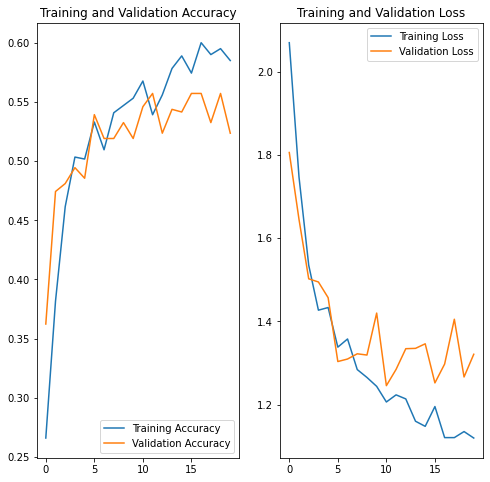

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Training Accuracy: 61.83
### Validation Accuracy: 54.36

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

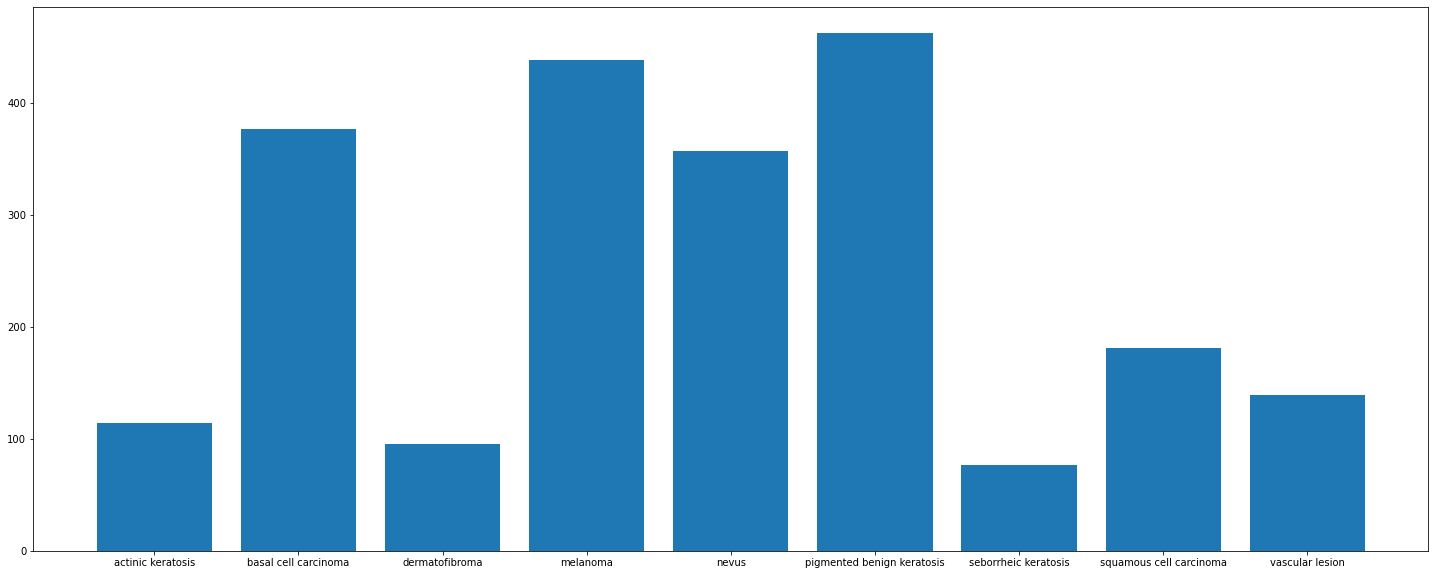

In [40]:
## Your code goes here.
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [41]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [51]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(700) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C49900AFA0>:   1%|          | 8/700 [00:00<01:50,  6.27 Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C49978E700>: 100%|██████████| 700/700 [00:07<00:00, 95.97 Samples/s]                   
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C499963BE0>: 100%|██████████| 700/700 [00:07<00:00, 92.39 Samples/s]                   
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C498F52B80>: 100%|██████████| 700/700 [00:07<00:00, 88.54 Samples/s] 
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C4A2248370>: 100%|██████████| 700/700 [00:35<00:00, 19.96 Samples/s]                   
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C499108CD0>: 100%|██████████| 700/700 [00:33<00:00, 21.20 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C498FD4F70>:   1%|▏         | 9/700 [00:00<01:25,  8.10 Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C4A2136BB0>: 100%|██████████| 700/700 [00:07<00:00, 91.00 Samples/s] 
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C496447EB0>: 100%|██████████| 700/700 [00:17<00:00, 40.21 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C4A2223190>:   1%|          | 7/700 [00:00<01:47,  6.43 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C4995D8040>: 100%|██████████| 700/700 [00:07<00:00, 95.82 Samples/s]                   
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C4A2606AF0>:   0%|          | 2/700 [00:00<01:35,  7.30 Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\Acer\Upgrad\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C497CC0A90>: 100%|██████████| 700/700 [00:07<00:00, 89.30 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


<BarContainer object of 9 artists>

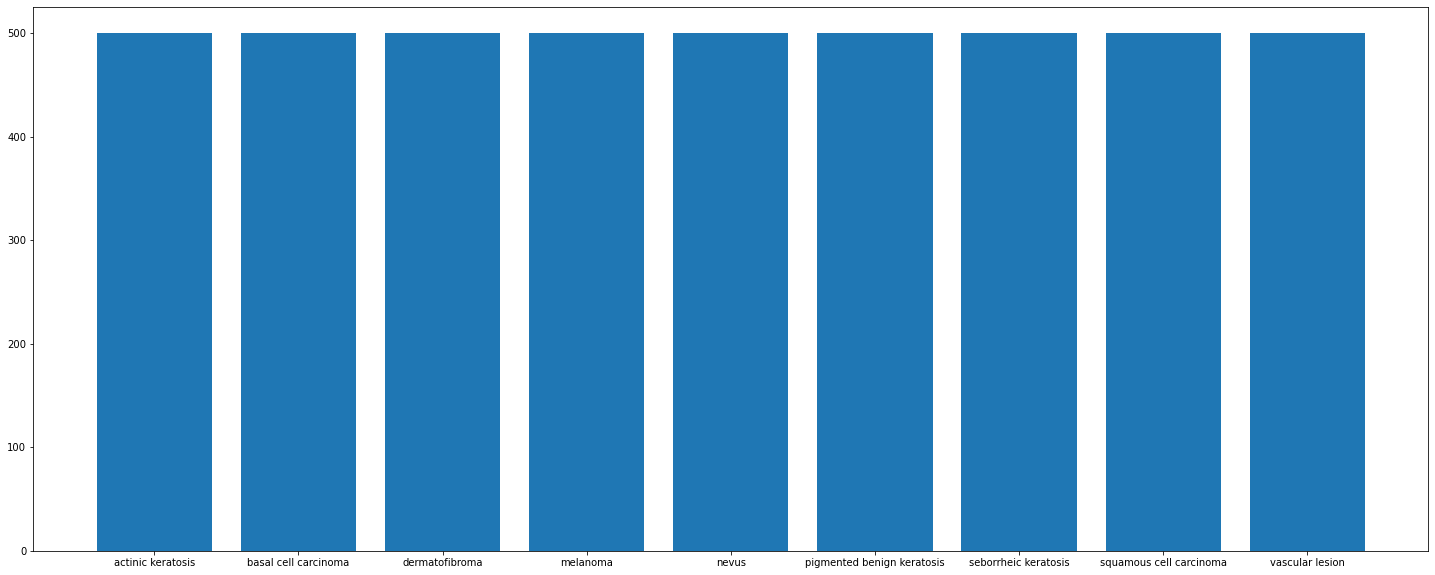

In [49]:
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [131]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\Acer\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_119bac80-a44e-45b4-8e63-1aade060dfe8.jpg',
 'C:\\Users\\Acer\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_312c93f4-7fa2-410a-9e49-3f6ca0b66528.jpg',
 'C:\\Users\\Acer\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3216710e-9f08-4c7a-9289-0f9e7877e9c2.jpg',
 'C:\\Users\\Acer\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_33ae609e-3b26-4326-aa2b-4edff97a55d0.jpg',
 'C:\\Users\\Acer\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The Int

In [132]:
x= list(x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg')))

In [133]:
listen_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
listen_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [136]:
#Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
    for file in data_dir_train.glob(name+'/*.jpg'):
        path_list.append(str(file))
        lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [137]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [138]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [139]:
new_df['Label'].value_counts()

actinic keratosis             1842
pigmented benign keratosis    1662
melanoma                      1638
basal cell carcinoma          1576
nevus                         1557
squamous cell carcinoma       1381
vascular lesion               1339
dermatofibroma                1295
seborrheic keratosis          1277
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [86]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [142]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13567 files belonging to 9 classes.
Using 2713 files for validation.


In [116]:
data_dir_train

"['C:\\\\Users\\\\Acer\\\\Upgrad\\\\CNN\\\\CNN_assignment\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\\\actinic keratosis\\\\output\\\\actinic keratosis_original_ISIC_0025780.jpg_119bac80-a44e-45b4-8e63-1aade060dfe8.jpg', 'C:\\\\Users\\\\Acer\\\\Upgrad\\\\CNN\\\\CNN_assignment\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\\\actinic keratosis\\\\output\\\\actinic keratosis_original_ISIC_0025780.jpg_312c93f4-7fa2-410a-9e49-3f6ca0b66528.jpg', 'C:\\\\Users\\\\Acer\\\\Upgrad\\\\CNN\\\\CNN_assignment\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\\\actinic keratosis\\\\output\\\\actinic keratosis_original_ISIC_0025780.jpg_3216710e-9f08-4c7a-9289-0f9e7877e9c2.jpg', 'C:\\\\Users\\\\Acer\\\\Upgrad\\\\CNN\\\\CNN_assignment\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\\\actinic keratosis\\\\output\\\\actinic keratosis_original_ISIC_0025780.jpg_33ae609e-3b26-4326-aa2b-4edff97a55d0.

#### **Todo:** Create a validation dataset

In [141]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13567 files belonging to 9 classes.
Using 10854 files for training.


#### **Todo:** Create your model (make sure to include normalization)

In [147]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(total_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [148]:
## your code goes here
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [149]:
epochs = 30

history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
340/340 [==============================] - 261s 701ms/step - loss: 1.6875 - accuracy: 0.3662 - val_loss: 1.3130 - val_accuracy: 0.5105
Epoch 2/30
340/340 [==============================] - 219s 644ms/step - loss: 1.1798 - accuracy: 0.5659 - val_loss: 1.0458 - val_accuracy: 0.6288
Epoch 3/30
340/340 [==============================] - 208s 611ms/step - loss: 0.8979 - accuracy: 0.6835 - val_loss: 0.8366 - val_accuracy: 0.7239
Epoch 4/30
340/340 [==============================] - 208s 612ms/step - loss: 0.6975 - accuracy: 0.7558 - val_loss: 0.6676 - val_accuracy: 0.7796
Epoch 5/30
340/340 [==============================] - 210s 618ms/step - loss: 0.5188 - accuracy: 0.8232 - val_loss: 0.5910 - val_accuracy: 0.7914
Epoch 6/30
340/340 [==============================] - 208s 611ms/step - loss: 0.3944 - accuracy: 0.8697 - val_loss: 0.5938 - val_accuracy: 0.8032
Epoch 7/30
340/340 [==============================] - 207s 609ms/step - loss: 0.3137 - accuracy: 0.8912 - val_loss: 0.4176 -

#### **Todo:**  Visualize the model results

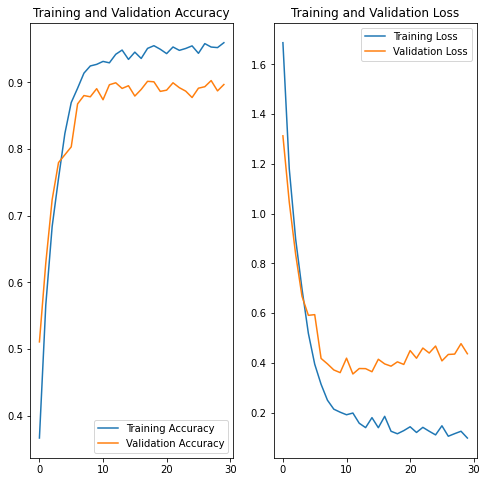

In [150]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



the validation accuracy is slightly increasing due to augmentation and we geting 90% accuracy in epoch 18 and data and also data class is balanced.

##### this is the final result of our accuracies

##### Training Accuracy : 96%
##### Validation Accuracy : 90%